In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
drive.mount('/content/drive')
%cd drive/MyDrive/Project/

Mounted at /content/drive
/content/drive/MyDrive/Project


**Location-Based Intelligence**<br>
Based on the given data, our objective is to find out locations that are suitable for Real Estate Investment in UK for the year 2017.<br>
The key factor that will be important is that the location should either be currently undervalued/ display strong potential to appreciate in the next few years.

The data size of file (`price_paid_records.csv`) is too large (2 GB) So, we will do a basic analysis on a small portion of the data for the year 2016 and 2017.

In [2]:
df = pd.read_csv('Datasets/UK_Housing.csv', engine='pyarrow')

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Non-Null Count     Dtype         
---  ------                             --------------     -----         
 0   Transaction unique identifier      22489348 non-null  object        
 1   Price                              22489348 non-null  int64         
 2   Date of Transfer                   22489348 non-null  datetime64[ns]
 3   Property Type                      22489348 non-null  object        
 4   Old/New                            22489348 non-null  object        
 5   Duration                           22489348 non-null  object        
 6   Town/City                          22489348 non-null  object        
 7   District                           22489348 non-null  object        
 8   County                             22489348 non-null  object        
 9   PPDCategory Type                   22489348 non-null  object      

As we look over the data, we observe that most columns are categorical (`object` dtype) in nature and there is only one numerical column: `Price`. Due to the innate nature of the data, there is no scope to impute the data as there are no missing values present in any of the column. So most of our data is in good state from source level itself.  

Due to huge data set we are creating chunks of dataset based on years and we will be using the most latest years present in dataset that are 2017 and 2016 for analysis and algorithm implementation

Now we need to change these date strings to datetime dtype

In [ ]:
# df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'].str.split().str[0], format='%Y-%m-%d')
# df['Date of Transfer'] = df['Date of Transfer'].apply(lambda x : datetime.strptime(x.split()[0], '%Y-%m-%d'))

In [4]:
df['Year'] = df['Date of Transfer'].dt.year

In [ ]:
london = df [df['Town/City'] == 'LONDON']

Performing some time series anlysis

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

london = london.set_index('Date of Transfer')
monthly_data = london['Price'].resample('M').mean()
model = ARIMA(monthly_data, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=12)


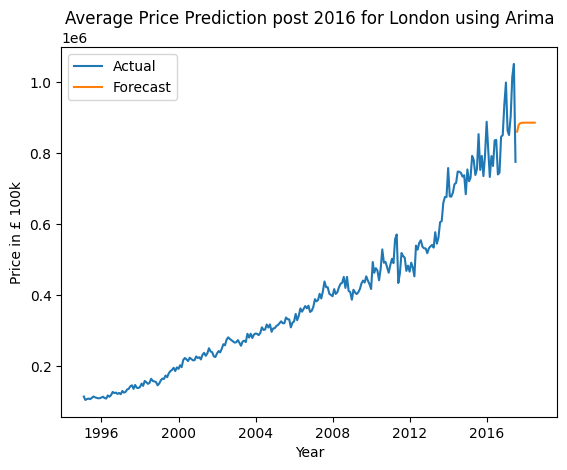

In [ ]:
plt.plot(monthly_data, label='Actual')
plt.plot(forecast, label='Forecast')
plt.ylabel('Price in £ 100k')
plt.xlabel('Year')
plt.title('Average Price Prediction post 2016 for London using Arima')
plt.legend()
plt.show()

In [ ]:
grouped_data = df.groupby(['Year', 'District'])['Price'].mean().reset_index()
grouped_data = grouped_data.sort_values(['Year', 'Price'], ascending=[True, False])
top_5_data = grouped_data.groupby('Year').head(5)

In [ ]:
top_5_data

Year                District         Price
199   1995  KENSINGTON AND CHELSEA  2.635511e+05
94    1995     CITY OF WESTMINSTER  1.830468e+05
337   1995             SOUTH BUCKS  1.615597e+05
423   1995          WEST BERKSHIRE  1.609606e+05
142   1995               ELMBRIDGE  1.549811e+05
...    ...                     ...           ...
8446  2017          CITY OF LONDON  3.582038e+06
8450  2017     CITY OF WESTMINSTER  2.445220e+06
8533  2017  KENSINGTON AND CHELSEA  2.208067e+06
8423  2017                  CAMDEN  1.389373e+06
8471  2017                  EALING  1.218807e+06

[115 rows x 3 columns]

In [ ]:
fig = px.bar(top_5_data, x='Year', y='Price', color='District', title='Top 5 Richest Places for Every Year')
fig.show()

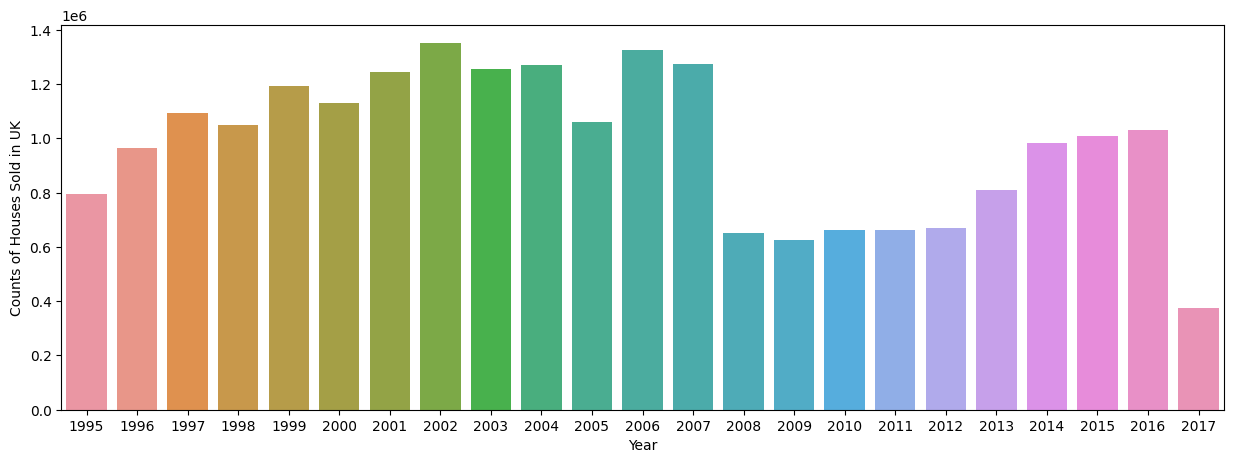

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Year');
plt.ylabel('Counts of Houses Sold in UK');

To perform the analysis. We wll slice the data on the for UK for most recent years that is year 2017 and 2016

In [5]:
dfy17 = df[df['Year']==2017]
dfy16 = df[df['Year']==2016]

In [ ]:
dfy17.tail()

Transaction unique identifier   Price Date of Transfer  \
22489343  {4C4EE000-291A-1854-E050-A8C063054F34}  175000       2017-02-20   
22489344  {4C4EE000-291B-1854-E050-A8C063054F34}  586945       2017-02-15   
22489345  {4C4EE000-291C-1854-E050-A8C063054F34}  274000       2017-02-24   
22489346  {4C4EE000-291D-1854-E050-A8C063054F34}   36000       2017-02-22   
22489347  {4C4EE000-291E-1854-E050-A8C063054F34}  145000       2017-03-03   

         Property Type Old/New Duration     Town/City    District  \
22489343             S       N        F         LEEDS       LEEDS   
22489344             D       N        F      WETHERBY       LEEDS   
22489345             D       N        L  HUDDERSFIELD    KIRKLEES   
22489346             T       N        F       HALIFAX  CALDERDALE   
22489347             T       N        F         LEEDS       LEEDS   

                  County PPDCategory Type Record Status - monthly file only  \
22489343  WEST YORKSHIRE                A                                 A   
22489344  WEST YORKSHIRE                A                                 A   
22489345  WEST YORKSHIRE                A                                 A   
22489346  WEST YORKSHIRE                A                                 A   
22489347  WEST YORKSHIRE                A                                 A   

          Year  
22489343  2017  
22489344  2017  
22489345  2017  
22489346  2017  
22489347  2017

## **Exploratory Data Analysis**

Dropping unique columns

In [ ]:
print('for 2017 df ',dfy17['Record Status - monthly file only'].value_counts())
print('for 2016 df ',dfy16['Record Status - monthly file only'].value_counts())

for 2017 df  A    375098
Name: Record Status - monthly file only, dtype: int64
for 2016 df  A    1032558
Name: Record Status - monthly file only, dtype: int64


1.   Since all records are of A values only we are removing this column as it doesn't make any contribution to Target.
2.   Dropping Transaction unique identifier as it's a unique identifier for each transaction which doesn't contribute to target


In [13]:
dfy17 = dfy17.drop(columns=['Record Status - monthly file only','Transaction unique identifier'])
dfy16 = dfy16.drop(columns=['Record Status - monthly file only','Transaction unique identifier'])

## Checking for Duplicates

In [14]:
print('2017',dfy17.duplicated().any())
print('2016',dfy16.duplicated().any())

2017 True
2016 True


There are duplicate rows hence dropping them.

In [15]:
dfy17.drop_duplicates( keep='first', inplace=True)
dfy16.drop_duplicates( keep='first', inplace=True)

## Checking for Null values

In [16]:
print('2017',dfy17.isnull().sum())
print('2016',dfy16.isnull().sum())

2017 Price               0
Date of Transfer    0
Property Type       0
Old/New             0
Duration            0
Town/City           0
District            0
County              0
PPDCategory Type    0
Year                0
dtype: int64
2016 Price               0
Date of Transfer    0
Property Type       0
Old/New             0
Duration            0
Town/City           0
District            0
County              0
PPDCategory Type    0
Year                0
dtype: int64


Columns: 'Price',  'Date of Transfer',  'Property Type',  'Old/New',  'Duration', 'PPDCategory Type'
are relevant for our purpose and all other columns are property identifiers

# Exploring Price

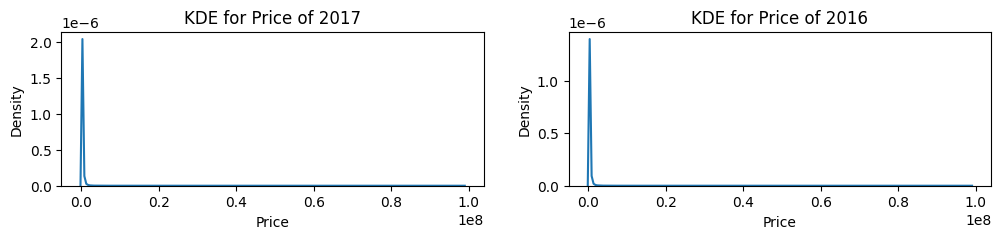

In [ ]:
fig,axe = plt.subplots(1,2,figsize=(12,2))
sns.kdeplot(dfy17.Price,ax=axe[0]);
axe[0].set_title('KDE for Price of 2017');
sns.kdeplot(dfy16.Price,ax=axe[1]);
axe[1].set_title('KDE for Price of 2016');

In [ ]:
dfy17.describe()

Price      Year
count  3.673410e+05  367341.0
mean   3.238214e+05    2017.0
std    9.640227e+05       0.0
min    1.000000e+00    2017.0
25%    1.370000e+05    2017.0
50%    2.175000e+05    2017.0
75%    3.449950e+05    2017.0
max    9.876539e+07    2017.0

#### Outlier detection
Anything beyond 3 std is removed from both sides of distribution

In [ ]:
def remove_outliers_zscore(dataframe, columns, threshold=3):
    for column in columns:
        z_scores = np.abs((dataframe[column] - dataframe[column].mean()) / dataframe[column].std())
        dataframe = dataframe[z_scores < threshold]
    return dataframe

In [ ]:
dfy17.shape

(367341, 10)

In [ ]:
before =dfy17.shape
dfy17 = remove_outliers_zscore(dfy17, ['Price'])
print('Outlier columns removed for 2017 df are',before[0]-dfy17.shape[0])

Outlier columns removed for 2017 df are 1554


In [ ]:
before =dfy16.shape
dfy16 = remove_outliers_zscore(dfy16, ['Price'])
print('Outlier row sumns removed for 2016 df are',before[0]-dfy16.shape[0])

Outlier row sumns removed for 2016 df are 4159


In [ ]:
dfy17.describe()

Price      Year
count  3.657870e+05  365787.0
mean   2.855395e+05    2017.0
std    2.687223e+05       0.0
min    1.000000e+00    2017.0
25%    1.360000e+05    2017.0
50%    2.160000e+05    2017.0
75%    3.400000e+05    2017.0
max    3.213938e+06    2017.0

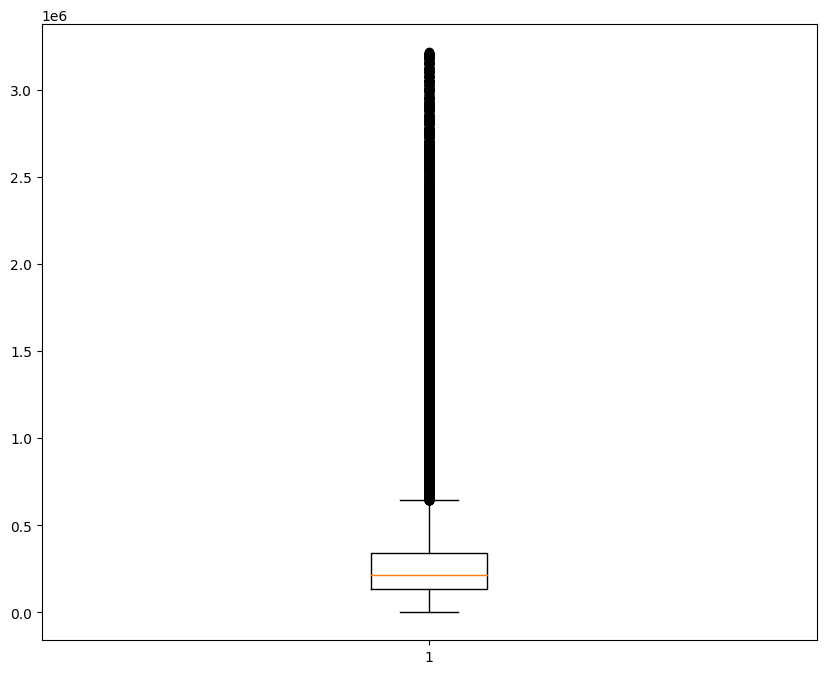

In [ ]:
fig = plt.figure(figsize =(10, 8))
plt.boxplot(dfy17.Price);

Text(0.5, 1.0, 'Count of Prices in 2017')

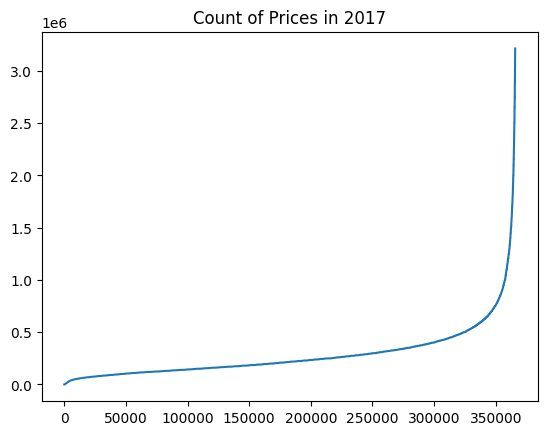

In [ ]:
sns.lineplot(sorted(dfy17.Price));
plt.title('Count of Prices in 2017')

## Exploring Date of Transfer

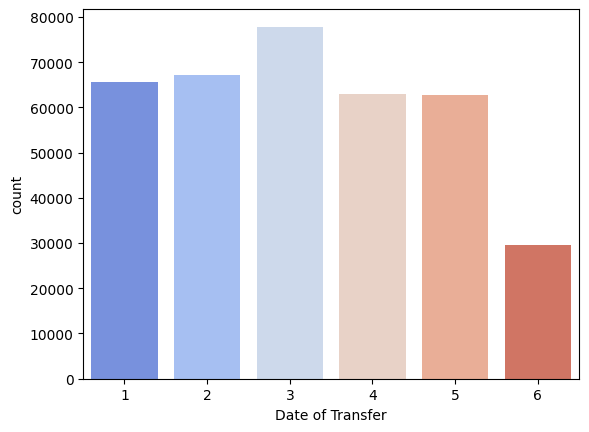

In [ ]:
sns.countplot(data=dfy17, x=dfy17['Date of Transfer'].dt.month, palette='coolwarm');

Highest number of transfers were done in March then in February followed by January.


1.   List item
2.   List item



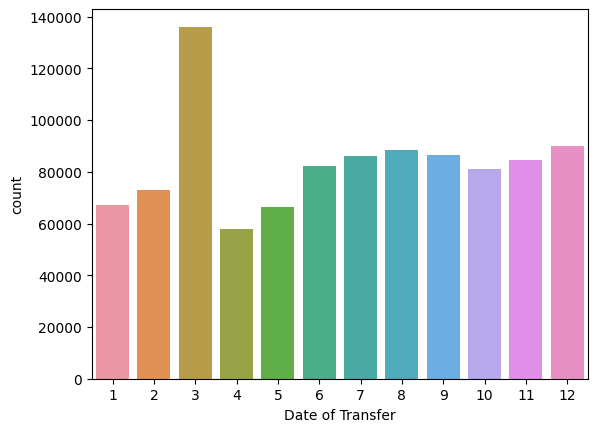

In [ ]:
sns.countplot(data=dfy16, x=dfy16['Date of Transfer'].dt.month);

Highest number of transfers were done in March then in December followed by August.

In [ ]:
median_prices_dfy17 = dfy17.groupby(dfy17['Date of Transfer'].dt.month)['Price'].median().reset_index()
median_prices_dfy16 = dfy16.groupby(dfy16['Date of Transfer'].dt.month)['Price'].median().reset_index()

# Create the horizontal bar plot using Plotly for dfy17
fig = px.bar(median_prices_dfy17, x='Price', y='Date of Transfer', orientation='h',
             title='Median Prices by Months',
             width=700, height=650,
             text=median_prices_dfy17['Price'])

# Add bars for dfy16 to the existing plot, shifting them to the right
fig.add_bar(x=median_prices_dfy16['Price'], y=median_prices_dfy16['Date of Transfer'],
            orientation='h', name='2016', text=median_prices_dfy16['Price'])

# Update the layout to show bars side by side
fig.update_layout(barmode='group')
# Show the plot
fig.update_yaxes(tickvals=list(range(1, 13)), ticktext=pd.date_range(start='2022-01-01', periods=12, freq='MS').strftime('%b'),
                 range=[0.5, 12.5])
fig.show()

Prices of 2017 are greater than 2016 for first 6 months data available

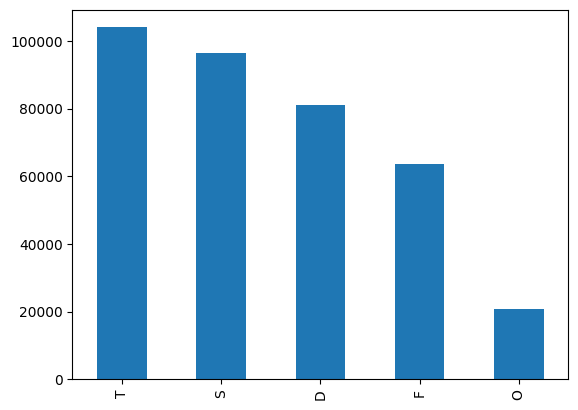

In [ ]:
dfy17['Property Type'].value_counts().plot(kind="bar");

## Geolocation based analysis







In [ ]:
print(f"There are {len(dfy17['Town/City'].unique())} cities or towns in this 2017 dataset")
print(f"There are {len(dfy16['Town/City'].unique())} cities or towns in this 2016 dataset")

There are 1144 cities or towns in this 2017 dataset
There are 1146 cities or towns in this 2016 dataset


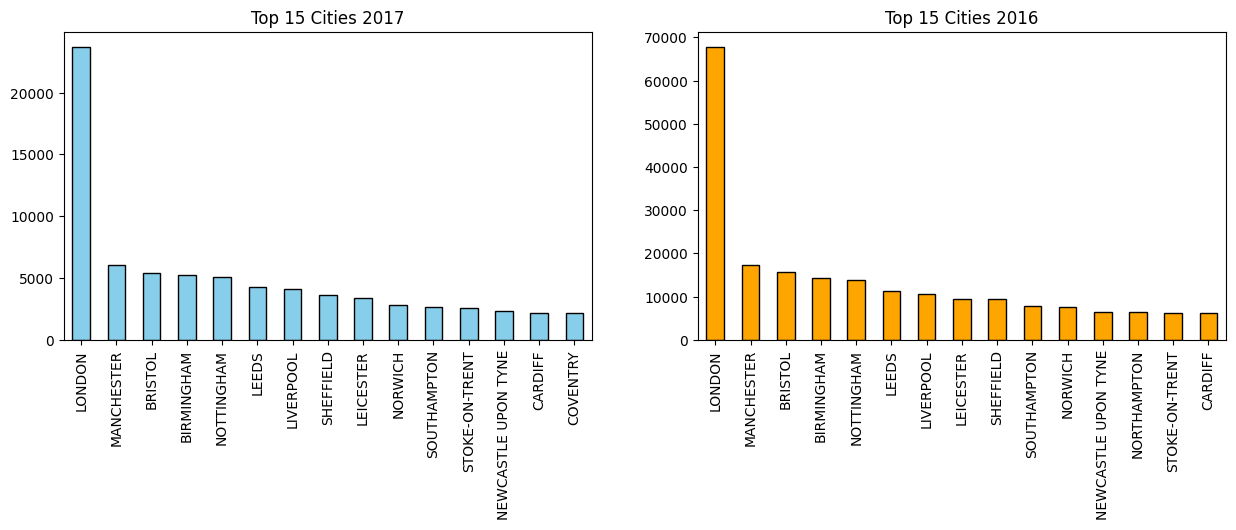

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
top_cities_dfy17 = dfy17['Town/City'].value_counts()[:15].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
top_cities_dfy16 = dfy16['Town/City'].value_counts()[:15].plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
axes[0].set_title('Top 15 Cities 2017');
axes[1].set_title('Top 15 Cities 2016');

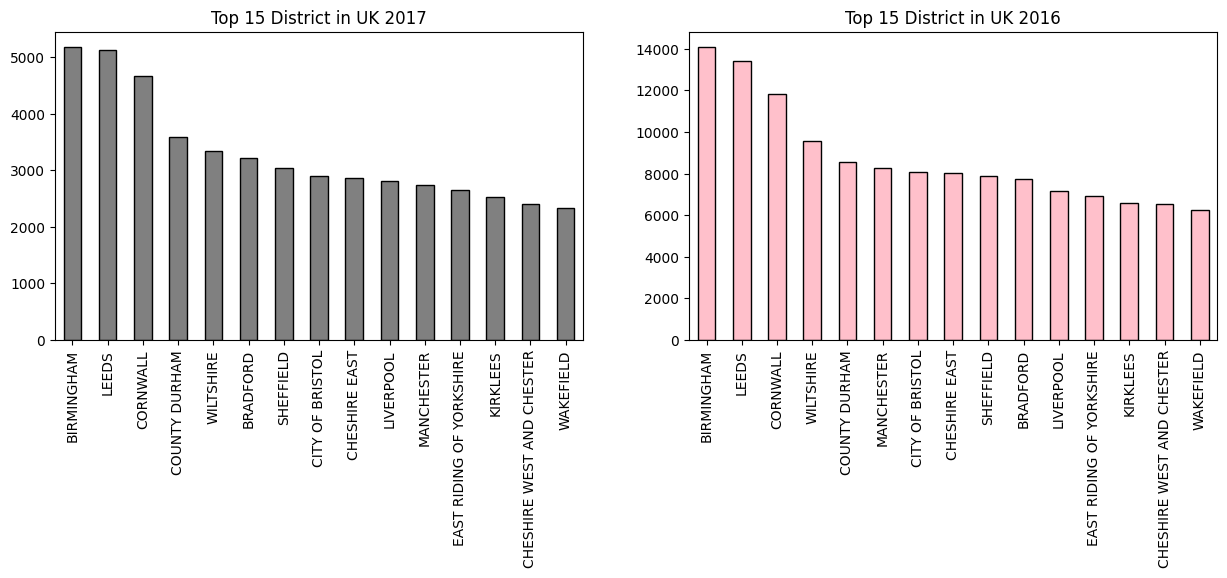

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
top_dis_dfy17 = dfy17['District'].value_counts()[:15].plot(kind='bar', ax=axes[0], color='grey', edgecolor='black')
top_dis_dfy16 = dfy16['District'].value_counts()[:15].plot(kind='bar', ax=axes[1], color='pink', edgecolor='black')
axes[0].set_title('Top 15 District in UK 2017');
axes[1].set_title('Top 15 District in UK 2016');

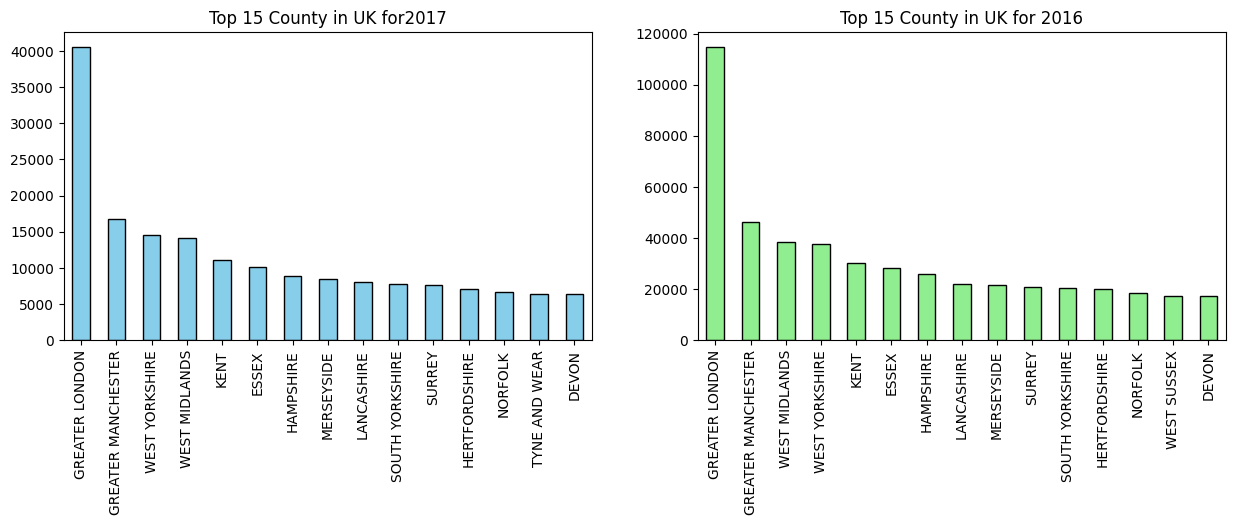

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
top_ct_dfy17 = dfy17['County'].value_counts()[:15].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
top_dis_dfy16 = dfy16['County'].value_counts()[:15].plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[0].set_title('Top 15 County in UK for2017');
axes[1].set_title('Top 15 County in UK for 2016');

\:::## investments on basis of Price

---



> Indented block

> Indented block





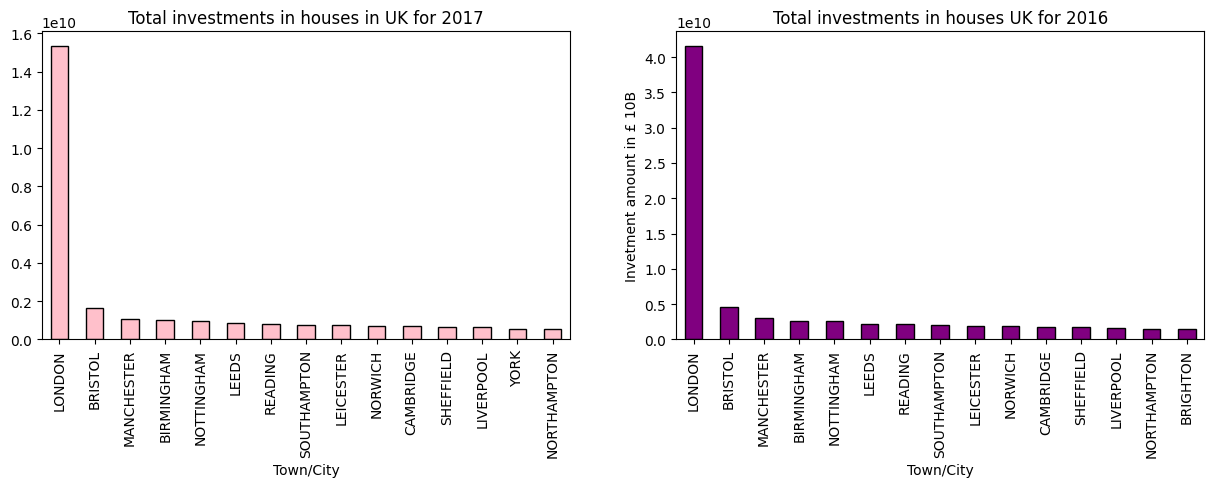

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
dfy17.groupby(dfy17['Town/City'])['Price'].sum().sort_values(ascending=False)[:15].plot(kind='bar', ax=axes[0], color='pink', edgecolor='black')
dfy16.groupby(dfy16['Town/City'])['Price'].sum().sort_values(ascending=False)[:15][:15].plot(kind='bar', ax=axes[1], color='purple', edgecolor='black')
axes[0].set_title('Total investments in houses in UK for 2017');
axes[1].set_ylabel('Invetment amount in £ 10B')
axes[1].set_title('Total investments in houses UK for 2016');

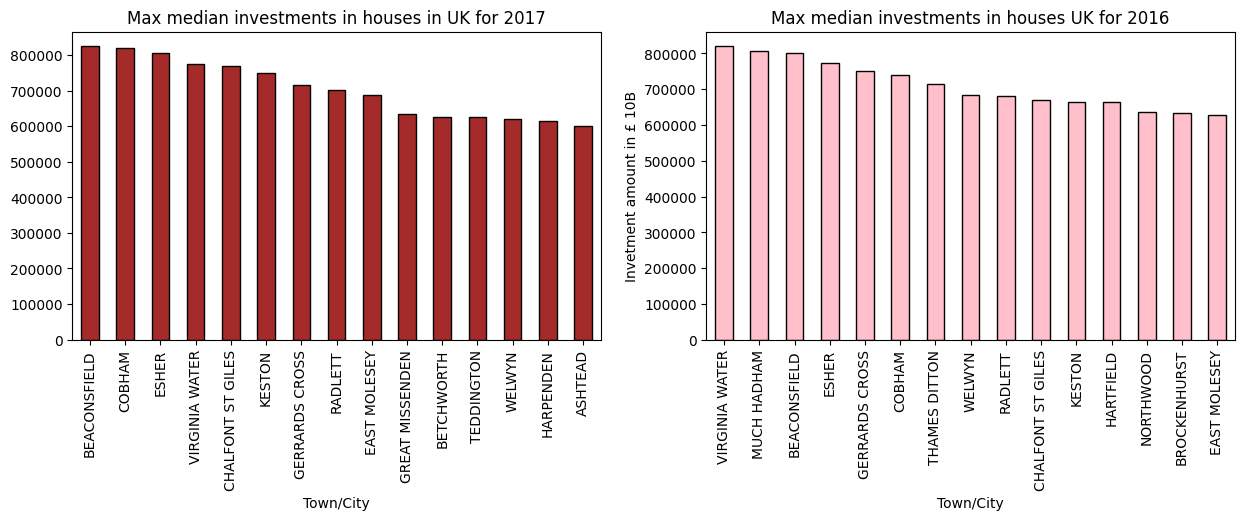

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
dfy17.groupby(dfy17['Town/City'])['Price'].median().sort_values(ascending=False)[:15].plot(kind='bar', ax=axes[0], color='brown', edgecolor='black')
dfy16.groupby(dfy16['Town/City'])['Price'].median().sort_values(ascending=False)[:15][:15].plot(kind='bar', ax=axes[1], color='pink', edgecolor='black')
axes[0].set_title('Max median investments in houses in UK for 2017');
axes[1].set_ylabel('Invetment amount in £ 10B')
axes[1].set_title('Max median investments in houses UK for 2016');

New town vs old town investments

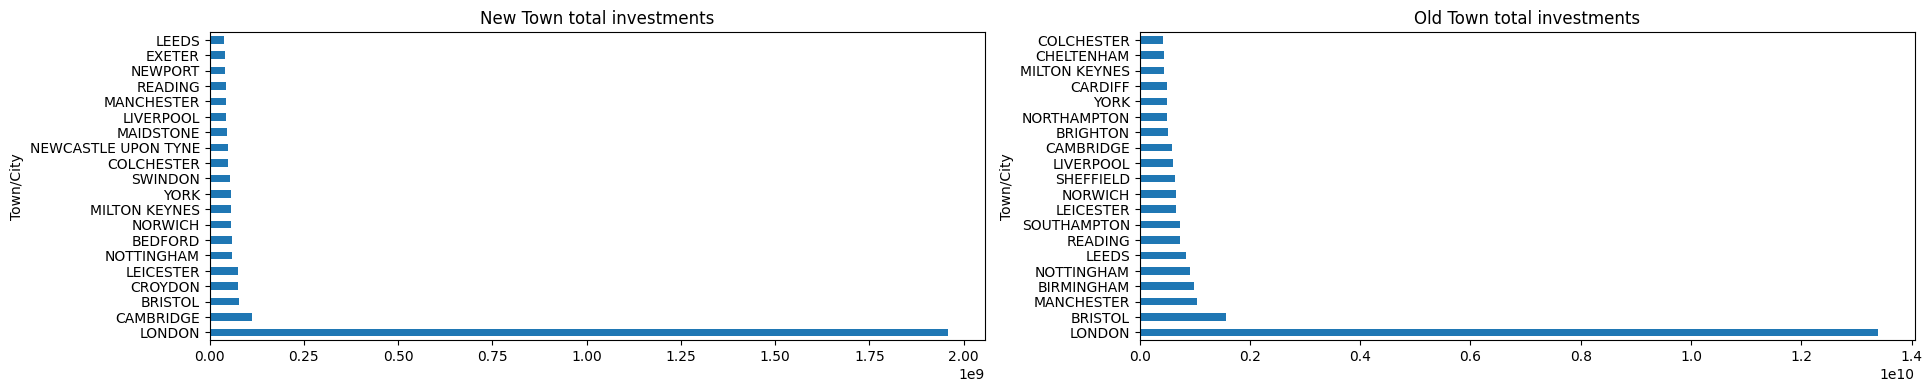

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 4))
dfy17[dfy17['Old/New']=='Y'].groupby(dfy17[dfy17['Old/New']=='Y']['Town/City'])['Price'].sum().sort_values(ascending=False)[:20].plot(kind="barh",ax=axes[0]);
dfy17[dfy17['Old/New']=='N'].groupby(dfy17[dfy17['Old/New']=='N']['Town/City'])['Price'].sum().sort_values(ascending=False)[:20].plot(kind="barh",ax=axes[1]);
axes[0].set_title('New Town total investments');
axes[1].set_title('Old Town total investments');

Text(0, 0.5, 'Prices in £100k')

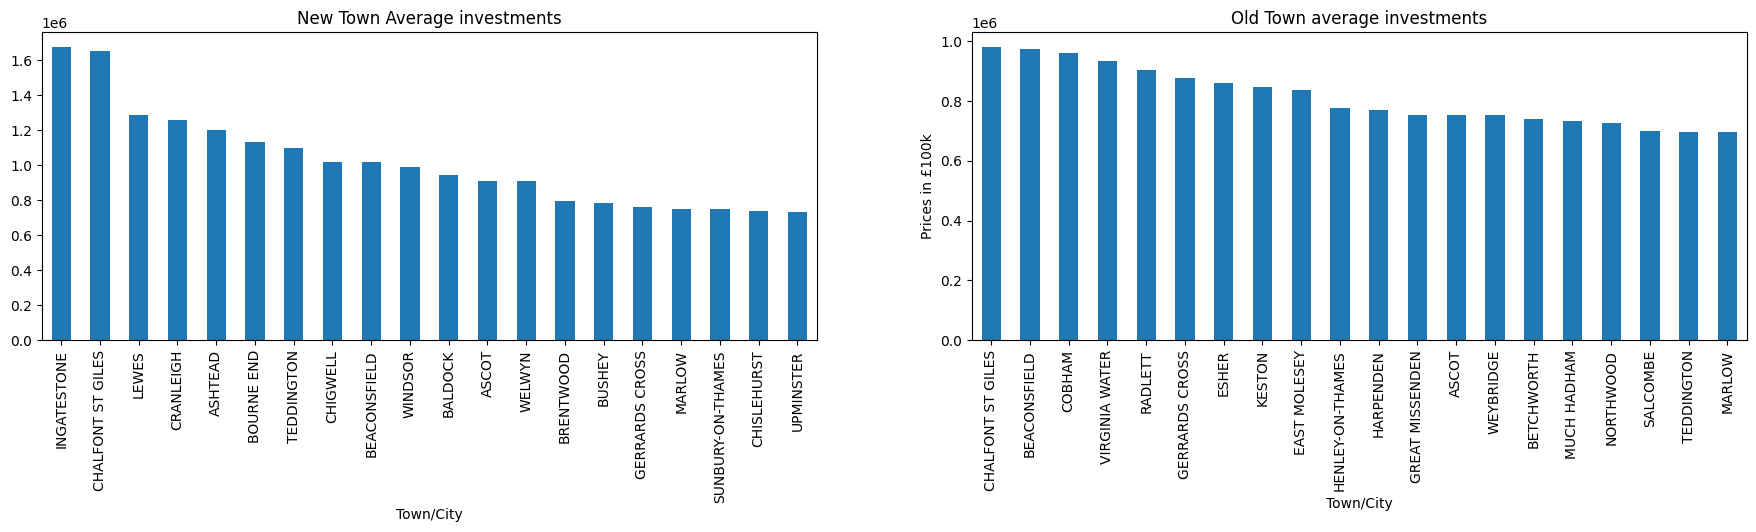

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 4))
dfy17[dfy17['Old/New']=='Y'].groupby(dfy17[dfy17['Old/New']=='Y']['Town/City'])['Price'].mean().sort_values(ascending=False)[:20].plot(kind="bar",ax=axes[0]);
dfy17[dfy17['Old/New']=='N'].groupby(dfy17[dfy17['Old/New']=='N']['Town/City'])['Price'].mean().sort_values(ascending=False)[:20].plot(kind="bar",ax=axes[1]);
axes[0].set_title('New Town Average investments');
axes[1].set_title('Old Town average investments');
axes[1].set_ylabel('Prices in £100k')

In [28]:
dfy17['month'] = dfy17['Date of Transfer'].dt.month
df_year_type_data = dfy17.groupby(['Property Type','month'], as_index=False)['Price'].median()
df_year_type_data.head()

Property Type  month     Price
0             D      1  320000.0
1             D      2  317125.0
2             D      3  310000.0
3             D      4  320000.0
4             D      5  310000.0

### Median Price trend over the months for different types of property

Text(0.5, 1.0, 'Property Type D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other')

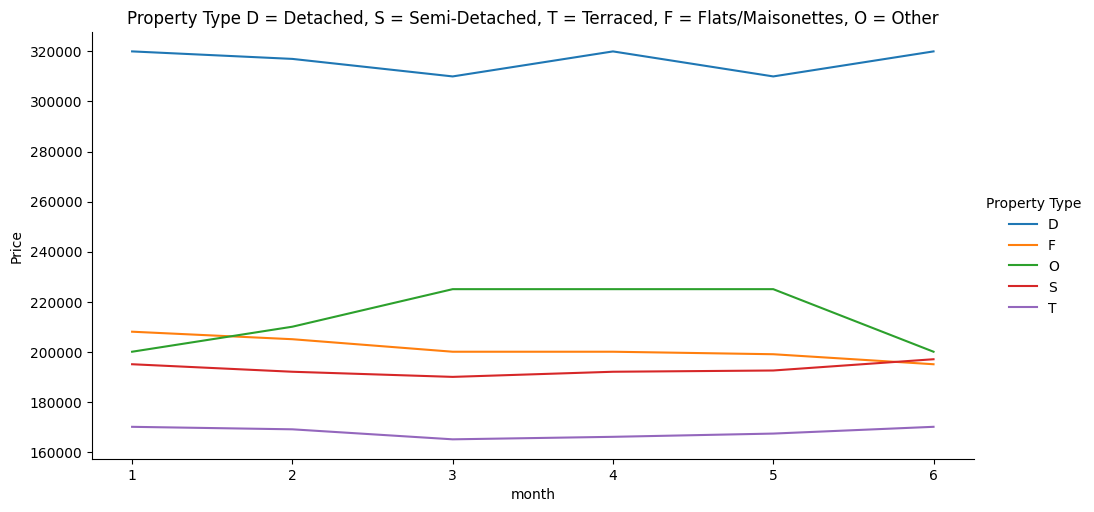

In [ ]:
sns.relplot(kind='line', data=df_year_type_data, x='month', y='Price', hue='Property Type', aspect=2);
plt.title('Property Type D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other')

### Median Price trend over the months for top 5 Promising towns

In [ ]:
df_town_count = dfy17['Town/City'].value_counts()

In [ ]:
df_town_count = df_town_count[df_town_count > 1000]

In [ ]:
df_town_data = dfy17.groupby(['Town/City','month'], as_index=False)['Price'].median()
most_promising = df_town_data[df_town_data['Town/City'].isin(df_town_count.index)]


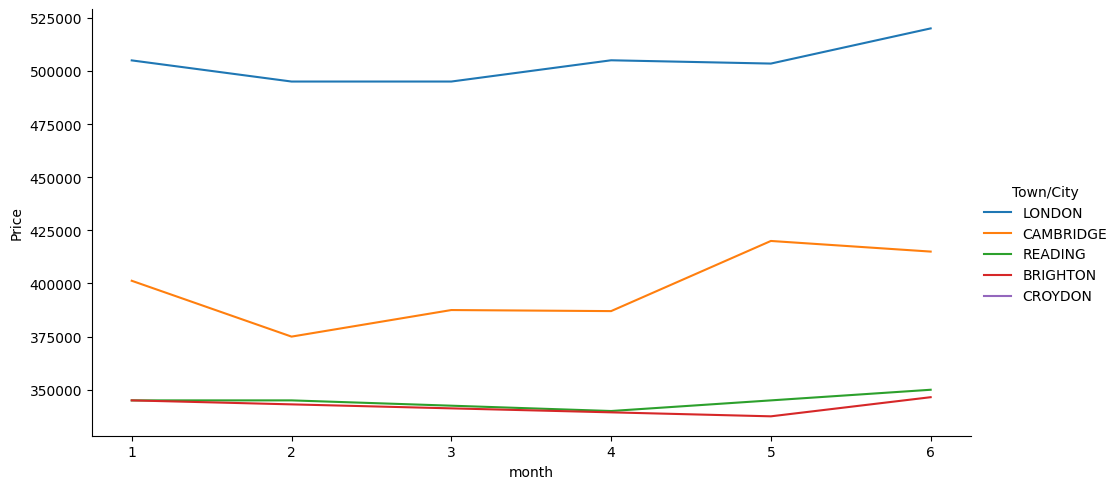

In [ ]:
plot_data = most_promising.sort_values(by='Price', ascending=False).head(20)
sns.relplot(kind='line', data=plot_data , x='month', y='Price', hue='Town/City', aspect=2);

# Last year comparison
Since data for 2017 is present for first six month so for fair comparision we will trim the data for year 2016 to first 6 months
## Month wise median and minimum housing prices

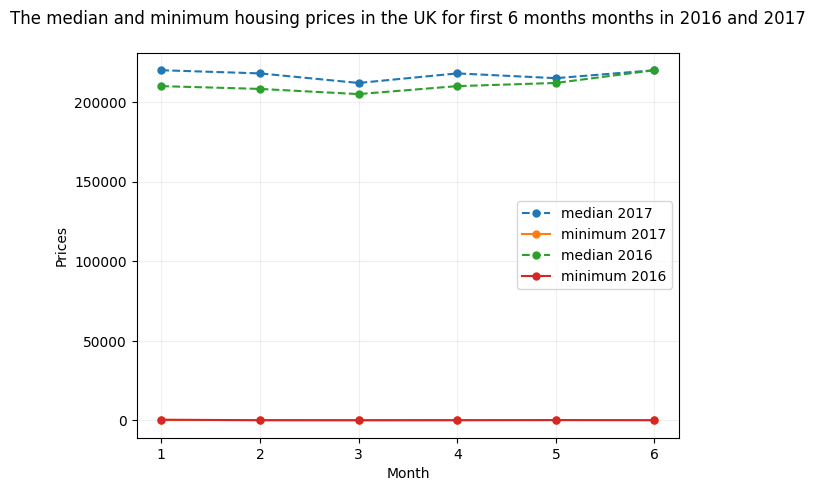

In [ ]:
dfy16['month'] = dfy16['Date of Transfer'].apply(lambda x: x.month)
dfy16 = dfy16[dfy16['month'].isin(list(range(1,7)))]

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(dfy17.groupby('month')['Price'].median(), label='median 2017',linestyle='dashed',marker='o', markersize=5);
ax.plot(dfy17.groupby('month')['Price'].min(), label='minimum 2017',marker='o', markersize=5);
ax.plot(dfy16.groupby('month')['Price'].median(), label='median 2016',linestyle='dashed',marker='o', markersize=5);
ax.plot(dfy16.groupby('month')['Price'].min(), label='minimum 2016',marker='o', markersize=5);
ax.set(xlabel='Month',ylabel='Prices',
           title="The median and minimum housing prices in the UK for first 6 months months in 2016 and 2017\n")
plt.grid(True,alpha=0.2)
ax.legend();

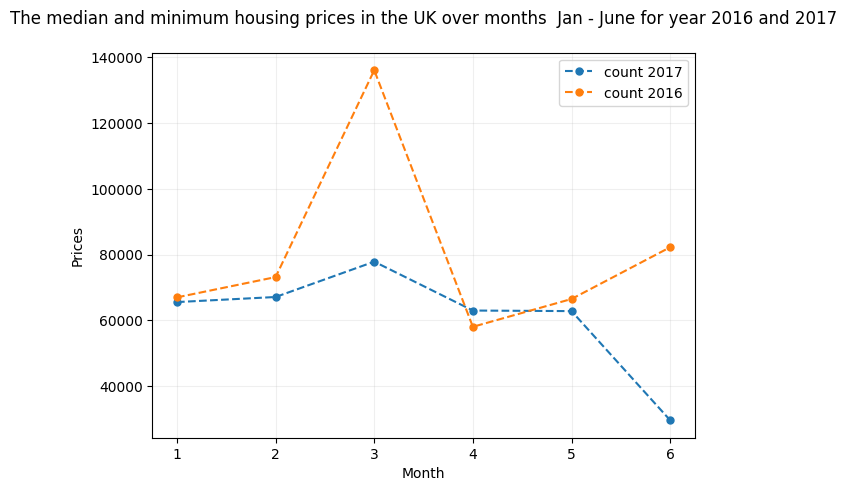

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(dfy17.groupby('month')['Price'].count(), label='count 2017',linestyle='dashed',marker='o', markersize=5);

ax.plot(dfy16.groupby('month')['Price'].count(), label='count 2016',linestyle='dashed',marker='o', markersize=5);
ax.set(xlabel='Month',ylabel='Prices',
           title="The median and minimum housing prices in the UK over months  Jan - June for year 2016 and 2017\n")
plt.grid(True,alpha=0.2)
ax.legend();

## Towns having max. growth in housing transaction

In [ ]:
gdf1 = dfy16.groupby(['Town/City'], as_index=False)['Date of Transfer'].count()
gdf = dfy17.groupby(['Town/City'], as_index=False)['Date of Transfer'].count()
gdf_m = pd.merge(gdf,gdf1,how='left',on='Town/City')
gdf_m

Town/City  Date of Transfer_x  Date of Transfer_y
0     ABBOTS LANGLEY                  52                84.0
1          ABERAERON                  21                18.0
2           ABERDARE                 235               333.0
3          ABERDOVEY                  12                21.0
4        ABERGAVENNY                 151               240.0
...              ...                 ...                 ...
1139         YATELEY                  88               167.0
1140       YELVERTON                  84                97.0
1141          YEOVIL                 432               628.0
1142            YORK                1991              2602.0
1143   YSTRAD MEURIG                   9                10.0

[1144 rows x 3 columns]

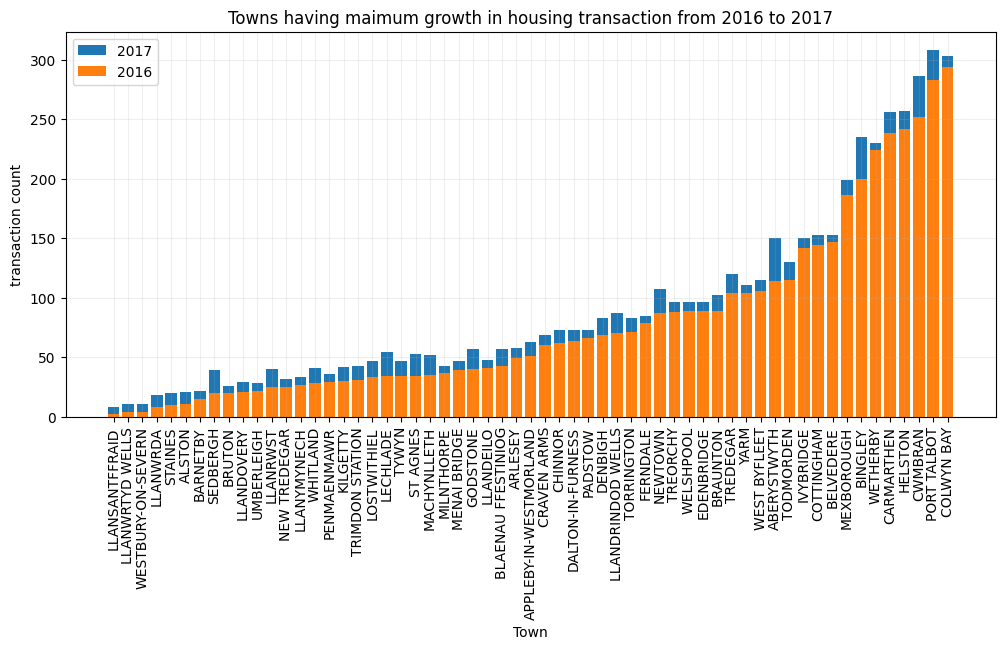

In [ ]:
gdf_m['growth'] = gdf_m['Date of Transfer_x'] - gdf_m['Date of Transfer_y']
gdf_g = gdf_m[gdf_m.growth>0].sort_values(by='growth',ascending=False)

graph_df = gdf_g[gdf_g['growth']>5].sort_values(by='Date of Transfer_y')
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(graph_df['Town/City'],graph_df['Date of Transfer_x'], label='2017');
ax.bar(graph_df['Town/City'],graph_df['Date of Transfer_y'], label='2016');
ax.set(xlabel='Town',ylabel='transaction count',
           title="Towns having maimum growth in housing transaction from 2016 to 2017")
ax.tick_params(axis='x', labelrotation=90)
plt.grid(True,alpha=0.2)
ax.legend();

In [ ]:
gdf_g.head(5)

Town/City  Date of Transfer_x  Date of Transfer_y  growth
7    ABERYSTWYTH                 150               114.0    36.0
109      BINGLEY                 235               200.0    35.0
303      CWMBRAN                 286               252.0    34.0
781  PORT TALBOT                 308               283.0    25.0
550     LECHLADE                  54                34.0    20.0

## Towns having max. growth in real estate investment

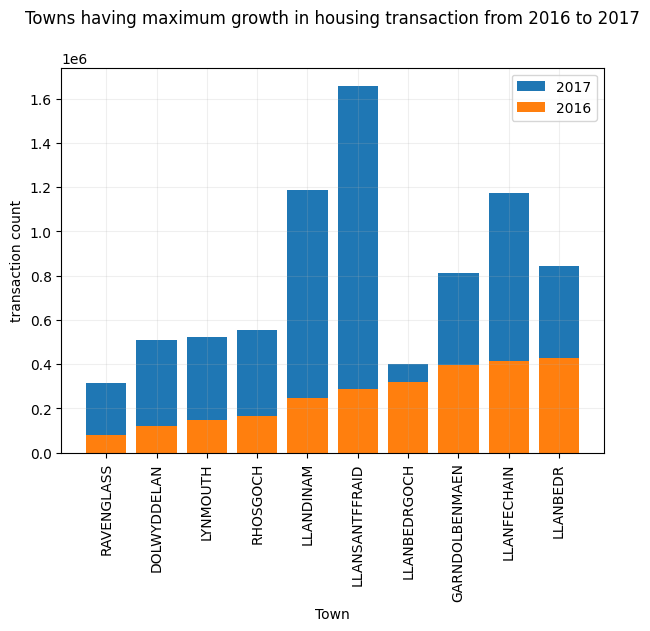

In [ ]:
gdf1 = dfy16.groupby(['Town/City'], as_index=False)['Price'].sum()
gdf = dfy17.groupby(['Town/City'], as_index=False)['Price'].sum()
gdf_m = pd.merge(gdf,gdf1,how='left',on='Town/City')
gdf_m['growth'] = gdf_m['Price_x'] - gdf_m['Price_y']
gdf_g = gdf_m[gdf_m.growth>0].sort_values(by='growth',ascending=False)

graph_df = gdf_g.sort_values(by='Price_y')[:10]
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(graph_df['Town/City'],graph_df['Price_x'], label='2017');
ax.bar(graph_df['Town/City'],graph_df['Price_y'], label='2016');
ax.set(xlabel='Town',ylabel='transaction count',
           title="Towns having maximum growth in housing transaction from 2016 to 2017\n")
ax.tick_params(axis='x', labelrotation=90)
plt.grid(True,alpha=0.2)
ax.legend();

## Towns having max. growth in 'NEW' real estate investment

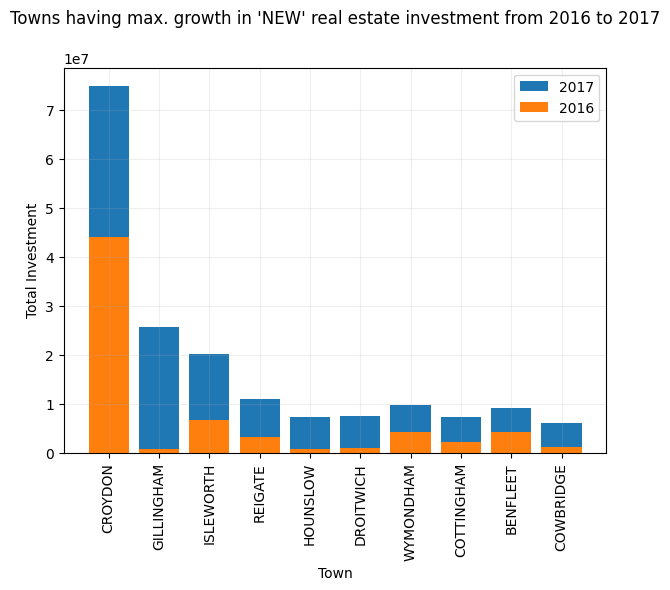

In [ ]:
newgdf1 = dfy16[dfy16['Old/New']=='Y']
newdf = dfy17[dfy17['Old/New']=='Y']
gdf1 = newgdf1.groupby(['Town/City'], as_index=False)['Price'].sum()
gdf = newdf.groupby(['Town/City'], as_index=False)['Price'].sum()
gdf_m = pd.merge(gdf,gdf1,how='left',on='Town/City')
gdf_m['growth'] = gdf_m['Price_x'] - gdf_m['Price_y']
gdf_g = gdf_m[gdf_m.growth>0].sort_values(by='growth',ascending=False)

graph_df = gdf_g.sort_values(by='growth',ascending=False)[:10]
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(graph_df['Town/City'],graph_df['Price_x'], label='2017');
ax.bar(graph_df['Town/City'],graph_df['Price_y'], label='2016');
ax.set(xlabel='Town',ylabel='Total Investment',
           title="Towns having max. growth in 'NEW' real estate investment from 2016 to 2017\n")
ax.tick_params(axis='x', labelrotation=90)
plt.grid(True,alpha=0.2)
ax.legend();

*Correational* Analysis

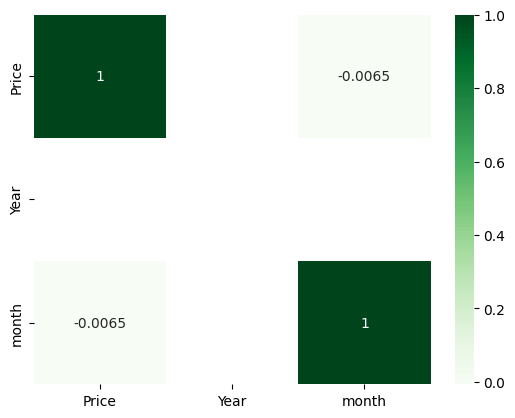

In [ ]:
sns.heatmap(dfy17.select_dtypes(['float','int']).corr(),annot=True,cmap ='Greens');

# Splitting the dataset

In [6]:
import gc
del df
gc.collect()

21

In [29]:
X = dfy17.head(10000)
X['Town/City'] = X['Town/City'].factorize()[0].astype('float32')
X['District'] = X['District'].factorize()[0].astype('float32')
X['County'] = X['County'].factorize()[0].astype('float32')

<ipython-input-29-80331c51f262>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Town/City'] = X['Town/City'].factorize()[0].astype('float32')
<ipython-input-29-80331c51f262>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['District'] = X['District'].factorize()[0].astype('float32')
<ipython-input-29-80331c51f262>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [30]:
X = X.drop(['Price','Date of Transfer','Year'],axis=1)
# X = dfy17.drop(['Price','Date of Transfer','Year',"Town/City",'County','District','month'],axis=1)
y = dfy17.head(10000)['Price']

In [31]:
cols_to_dummies = ['Property Type', 'Old/New', 'Duration', 'PPDCategory Type']
dummies = pd.get_dummies(X[cols_to_dummies], columns=cols_to_dummies)
X = X.drop(cols_to_dummies, axis=1).join(dummies)

In [32]:
X.shape

(10000, 14)

In [33]:
X.columns

Index(['Town/City', 'District', 'County', 'month', 'Property Type_D',
       'Property Type_F', 'Property Type_S', 'Property Type_T', 'Old/New_N',
       'Old/New_Y', 'Duration_F', 'Duration_L', 'PPDCategory Type_A',
       'PPDCategory Type_B'],
      dtype='object')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X.head(5000), y.head(5000), random_state=1501)

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Implementing KNN

In [36]:
from KNN import KNNRegressor

In [37]:
param_grid = {
    'n_neighbors': range(1, 6),
    'distance_type': [1, 2],
    'weighted': [True, False]
}

# Creating a KNNRegressor
knn_model = KNNRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5,refit=False)

# Fitting GridSearchCV object
grid_search.fit(X_train_scaled, y_train)
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=

In [38]:
knn_score = grid_search.best_score_
knn_score

0.3943504599849107

In [39]:
train_score = []
test_score = []

neighbors = range(1, 11)
for n in neighbors:
    knn = KNNRegressor(n_neighbors=n, distance_type = grid_search.best_params_['distance_type'], weighted = grid_search.best_params_['weighted'])
    knn.fit(X_train_scaled, y_train)
    # Getting Training Scores
    train_score.append(knn.score(X_train_scaled, y_train))
    # Getting Testing Scores
    test_score.append(knn.score(X_test_scaled, y_test))

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=5, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=6, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=7, distance_type = 1, weighted = True)


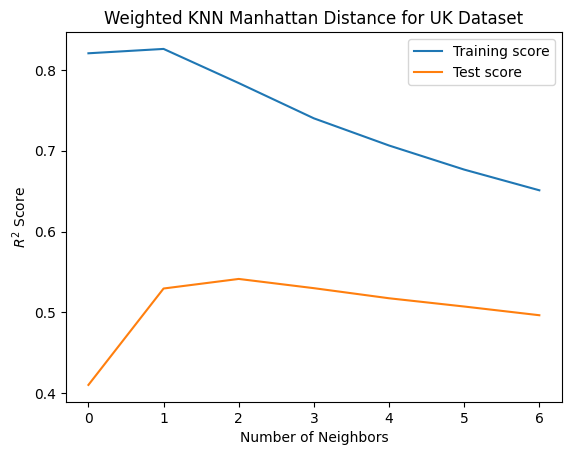

In [40]:
    sns.lineplot(train_score, label='Training score')
    sns.lineplot(test_score, label='Test score')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('$R^2$ Score')
    plt.legend()
    plt.title('Weighted KNN Manhattan Distance for UK Dataset');

In [44]:
knn = KNNRegressor(n_neighbors=2, distance_type = grid_search.best_params_['distance_type'], weighted = grid_search.best_params_['weighted'])
knn.fit(X_train_scaled, y_train)
knn_score = knn.score(X_test_scaled, y_test)
knn_score

KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)


0.5294830929070281

Implemnting Random Forest Regressor

In [41]:
p = int(np.ceil(X_train_scaled.shape[1]/3))

In [42]:
from RandomForest import RandomForestRegressor

In [51]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10]

}

best_score = 0.0
best_params = {}
for n in param_grid['n_estimators']:
  for s in param_grid['min_samples_split']:
      for d in param_grid['max_depth']:
          params = {'min_samples_split': 50, 'max_depth': d}
          rf = RandomForestRegressor(n_estimators=n, max_features=p, **params)
          rf.fit(X_train_scaled, y_train)
          current_score = rf.score_r2(X_test_scaled, y_test)
          if current_score > best_score:
              best_score = current_score
              best_params = params
              best_params['n_estimators']=n
          print(f'For n_estimator {n} , sample split {s} and max depth {d} the current score is {current_score}')
print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score}')

For n_estimator 10 , sample split 2 and max depth 1 the current score is 0.08929092523236115
For n_estimator 10 , sample split 2 and max depth 5 the current score is 0.36058383611449374
For n_estimator 10 , sample split 2 and max depth 10 the current score is 0.5052426703746988
For n_estimator 10 , sample split 5 and max depth 1 the current score is 0.05654259015708839
For n_estimator 10 , sample split 5 and max depth 5 the current score is 0.3740543798997476
For n_estimator 10 , sample split 5 and max depth 10 the current score is 0.47430731120701075
For n_estimator 10 , sample split 10 and max depth 1 the current score is 0.06847794501628335
For n_estimator 10 , sample split 10 and max depth 5 the current score is 0.40036995418597826
For n_estimator 10 , sample split 10 and max depth 10 the current score is 0.43809808935827066
For n_estimator 50 , sample split 2 and max depth 1 the current score is 0.07678172420473722
For n_estimator 50 , sample split 2 and max depth 5 the current sc

In [75]:
random_forest_score=best_score

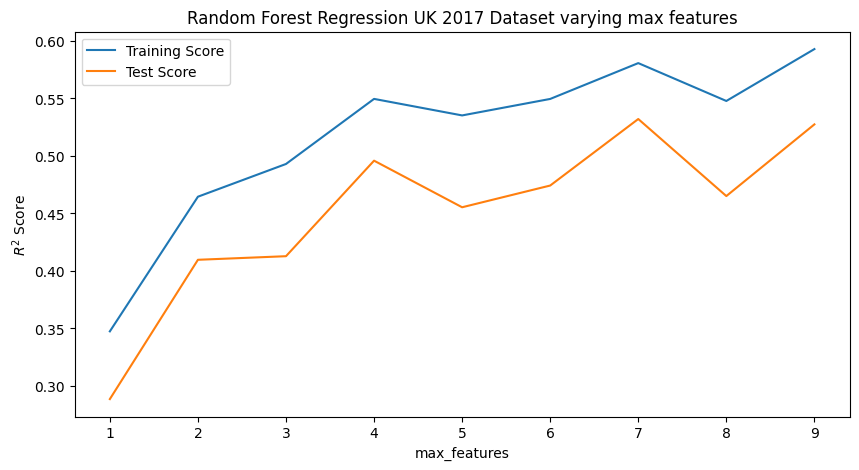

In [59]:
p = [i for i in range(1,int(np.ceil(X_train_scaled.shape[1]/3)+5))]
train_score = []
test_score = []
for i in p:
    rf = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = best_params['max_depth'],
                               max_features = i)
    rf.fit(X_train_scaled, y_train)
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=p, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=p, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'max_features',
       ylabel = '$R^2$ Score',
       xticks =p,
       title = 'Random Forest Regression UK 2017 Dataset varying max features')
ax.legend();

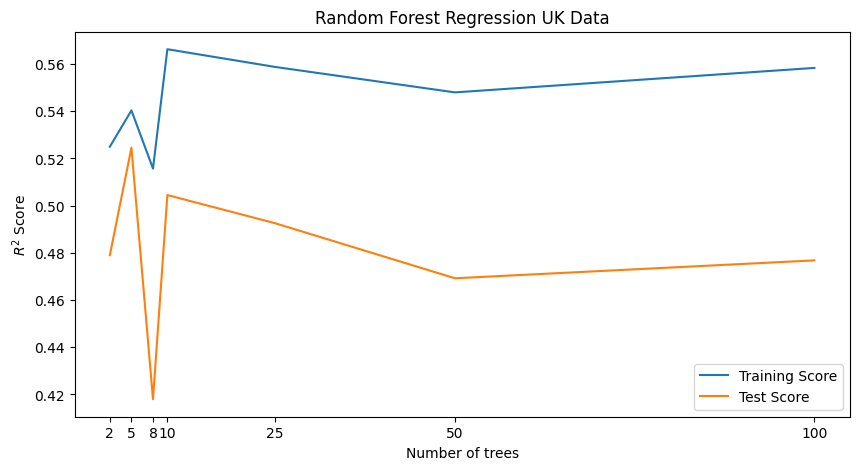

In [55]:
p = int(np.ceil(X_train_scaled.shape[1]/3))
train_score = []
test_score = []
num_trees = [2,5,8,10,25,50,100]
for n in num_trees:
    rf = RandomForestRegressor(n_estimators = n,
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = best_params['max_depth'],
                               max_features = p)
    rf.fit(X_train_scaled.to_numpy(), y_train.to_numpy())
    train_score.append(rf.score_r2(X_train_scaled.to_numpy(), y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=num_trees, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=num_trees, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Number of trees',
       ylabel = '$R^2$ Score',
       xticks =num_trees,
       title = 'Random Forest Regression UK Data')
ax.legend();

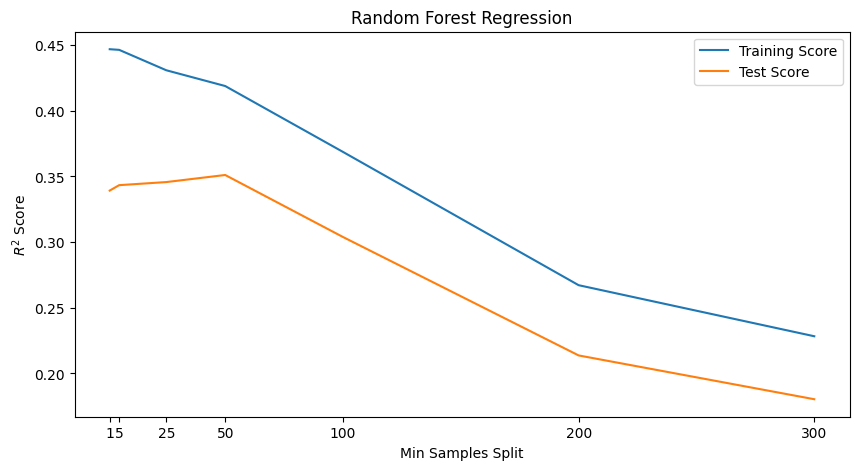

In [56]:
train_score = []
test_score = []
samples = [1,5,25, 50, 100, 200,300]
for s in samples:
    rf = RandomForestRegressor(n_estimators = 10,
                               min_samples_split = s,
                               max_depth = best_params['max_depth'],
                               max_features = p)
    rf.fit(X_train_scaled[:1000], y_train[:1000])
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=samples, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=samples, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Min Samples Split',
      ylabel = '$R^2$ Score',
      xticks =samples,
      title = 'Random Forest Regression')
ax.legend();

In [67]:
train_score = []
test_score = []
depth = [2, 5, 8, 12,25,50,100]
for d in depth:
    rf = RandomForestRegressor(n_estimators = 10,
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = d,
                               max_features = p)
    rf.fit(X_train_scaled, y_train)
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

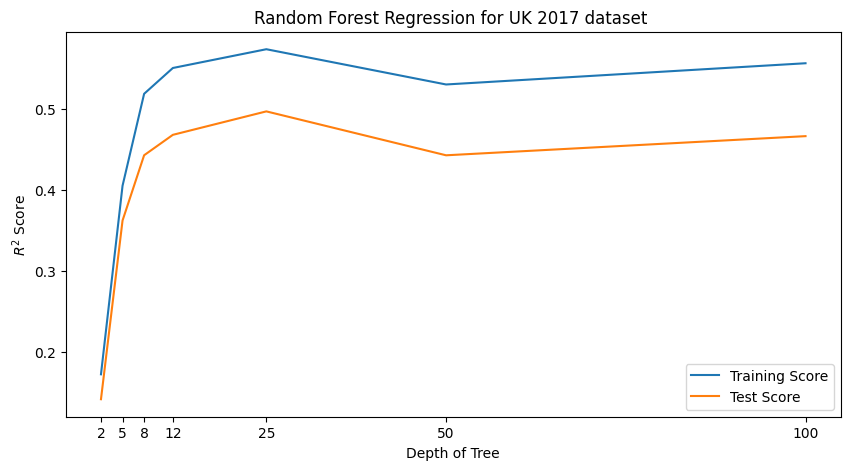

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=depth, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=depth, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Depth of Tree',
       ylabel = '$R^2$ Score',
       xticks = depth,
       title = 'Random Forest Regression for UK 2017 dataset ')
ax.legend();

### Implementing Multilayer perceptron (NN)

In [78]:
from MLP import MLP

In [79]:
n_inputs = X_train.shape[1]
n_hidden1 = 30
n_hidden2 = 30
n_outputs = 1
mlp = MLP(n_inputs, n_hidden1, n_hidden2, n_outputs,activation='relu')
mlp.fit(X_train_scaled.to_numpy(), np.array(y_train))
y_pred_test = mlp.predict(X_test)
test_mse = mlp.mse_loss(np.array(y_test), y_pred_test.to_numpy())
print(f'Test MSE: {test_mse:.4f}')
test_r2 = r2_score(np.array(y_test), y_pred_test)
print(f'Test R-squared score: {test_r2:.4f}')

epochs = 0 ============> loss 159702114240.372 
epochs = 50 ============> loss 1.5717450928517966e+26 
epochs = 100 ============> loss 2.0844413619376372e+25 
epochs = 150 ============> loss 2.764376877088299e+24 
epochs = 200 ============> loss 3.6661043376523424e+23 
epochs = 250 ============> loss 4.861971291238729e+22 
epochs = 300 ============> loss 6.44792473423026e+21 
epochs = 350 ============> loss 8.551209147554709e+20 
epochs = 400 ============> loss 1.1340575601024524e+20 
epochs = 450 ============> loss 1.5039821057047085e+19 
epochs = 500 ============> loss 1.9945744483817802e+18 
epochs = 550 ============> loss 2.645196366030511e+17 
epochs = 600 ============> loss 3.5080535791375184e+16 
epochs = 650 ============> loss 4652424136839200.0 
epochs = 700 ============> loss 617061482498676.4 
epochs = 750 ============> loss 81893479405764.08 
epochs = 800 ============> loss 10919736506500.1 
epochs = 850 ============> loss 1507230243011.3286 
epochs = 900 ============> loss

In [ ]:
param_grid = { 'n_hidden1': [10, 20], 'n_hidden2': [10, 20],
              'learning_rate': [0.01, 0.1], 'n_epochs': [500,1000, 2000] }
best_score = float('-inf')
best_params = {}

for h1 in param_grid['n_hidden1']:
    for h2 in param_grid['n_hidden2']:
        for lr in param_grid['learning_rate']:
            for ne in param_grid['n_epochs']:

                mlp = MLP(n_inputs, h1, h2, n_outputs,activation='relu')
                mlp.fit(X_train_scaled.to_numpy(), np.array(y_train), learning_rate=lr, n_epochs=ne)
                y_pred_test = mlp.predict(X_test_scaled)
                current_score = r2_score(np.array(y_test), y_pred_test.to_numpy())
                if current_score > best_score:
                    best_score = current_score
                    best_params = {'n_hidden1': h1, 'n_hidden2': h2, 'learning_rate': lr, 'n_epochs': ne}
                print(f'For n_hidden1={h1}, n_hidden2={h2}, learning_rate={lr}, n_epochs={ne}, the current score is {current_score:.4f}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score:.4f}')

epochs = 0 ============> loss 148068137588.41962 
epochs = 50 ============> loss 3.4698326316111268e+22 
epochs = 100 ============> loss 4.60167662638229e+21 
epochs = 150 ============> loss 6.102723106104701e+20 
epochs = 200 ============> loss 8.093404285641046e+19 
epochs = 250 ============> loss 1.073343686876917e+19 
epochs = 300 ============> loss 1.4234636791456335e+18 
epochs = 350 ============> loss 1.8877916934570256e+17 
epochs = 400 ============> loss 2.5035857985904576e+16 
epochs = 450 ============> loss 3320292752631849.5 
For n_hidden1=10, n_hidden2=10, learning_rate=0.01, n_epochs=500, the current score is -7421.6054
epochs = 0 ============> loss 148068137588.41962 
epochs = 50 ============> loss 3.4698326316111268e+22 
epochs = 100 ============> loss 4.60167662638229e+21 
epochs = 150 ============> loss 6.102723106104701e+20 
epochs = 200 ============> loss 8.093404285641046e+19 
epochs = 250 ============> loss 1.073343686876917e+19 
epochs = 300 ============> loss 1.

In [ ]:
mlp_score=best_score

In [ ]:
train_losses = []
test_mses = []
n_epochs = 5000
learning_rate=best_params['learning_rate']
# Train the MLP for a fixed number of epochs
for epoch in range(1,n_epochs+1):
    # Forward pass: compute the predictions of the MLP on the training set
    y_pred, z1, a1, z2, a2 = mlp.forward_pass(X_train_scaled.to_numpy())

    # Compute the training loss
    loss = mlp.mse_loss(y_train, y_pred)
    train_losses.append(loss)

    # Backward pass: compute the gradients and update the weights and biases of the MLP
    d_z3, d_weights1, d_biases1, d_weights2, d_biases2, d_weights3, d_biases3 = mlp.backward_pass(X_train_scaled.to_numpy(), y_train.to_numpy(), y_pred, z1, a1, z2, a2)
    mlp.update_weights_biases(learning_rate, d_weights1, d_biases1, d_weights2, d_biases2, d_weights3, d_biases3)

    # Evaluate the trained MLP on the test set
    y_pred_test = mlp.predict(X_test_scaled)

    test_mse = mlp.mse_loss(y_test, y_pred_test.to_numpy())
    test_mses.append(test_mse)

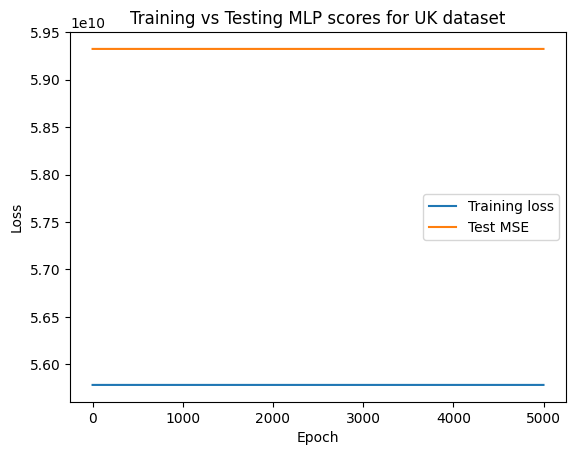

In [ ]:
plt.plot(train_losses, label='Training loss');
plt.plot(test_mses, label='Test MSE');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.title('Training vs Testing MLP scores for UK dataset')
plt.legend();

Implementing Kernelized Ridge regression

In [76]:
from KernelizedRidge import KernelizedRidgeRegression

In [77]:
param_grid = {
    'kernel': ['linear', 'polynomial', 'rbf'],
    'alpha': [0.1, 1, 10, 50],
    'degree': [2, 3, 4]
}

best_score = 0.0
best_params = {}
score_saver = {}

for k in param_grid['kernel']:
    score_saver[k] = {}
    for a in param_grid['alpha']:
        score_saver[k][a] = {}
        for d in param_grid['degree']:
            rr = KernelizedRidgeRegression(alpha=a, kernel=k, degree=d)
            rr.fit(X_train_scaled, y_train.to_numpy())
            current_score = rr.score(X_test_scaled, y_test)
            score_saver[k][a][d] = current_score
            if current_score > best_score:
                best_score = current_score
                best_params = {'alpha': a, 'kernel': k, 'degree': d}
            print(f'For kernel={k}, alpha={a}, and degree={d}, the current score is {current_score:.4f}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score:.4f}')
krr_model_score= best_score

For kernel=linear, alpha=0.1, and degree=2, the current score is 0.1388
For kernel=linear, alpha=0.1, and degree=3, the current score is 0.1388
For kernel=linear, alpha=0.1, and degree=4, the current score is 0.1388
For kernel=linear, alpha=1, and degree=2, the current score is 0.1386
For kernel=linear, alpha=1, and degree=3, the current score is 0.1386
For kernel=linear, alpha=1, and degree=4, the current score is 0.1386
For kernel=linear, alpha=10, and degree=2, the current score is 0.1370
For kernel=linear, alpha=10, and degree=3, the current score is 0.1370
For kernel=linear, alpha=10, and degree=4, the current score is 0.1370
For kernel=linear, alpha=50, and degree=2, the current score is 0.1306
For kernel=linear, alpha=50, and degree=3, the current score is 0.1306
For kernel=linear, alpha=50, and degree=4, the current score is 0.1306
For kernel=polynomial, alpha=0.1, and degree=2, the current score is 0.1509
For kernel=polynomial, alpha=0.1, and degree=3, the current score is 0.1

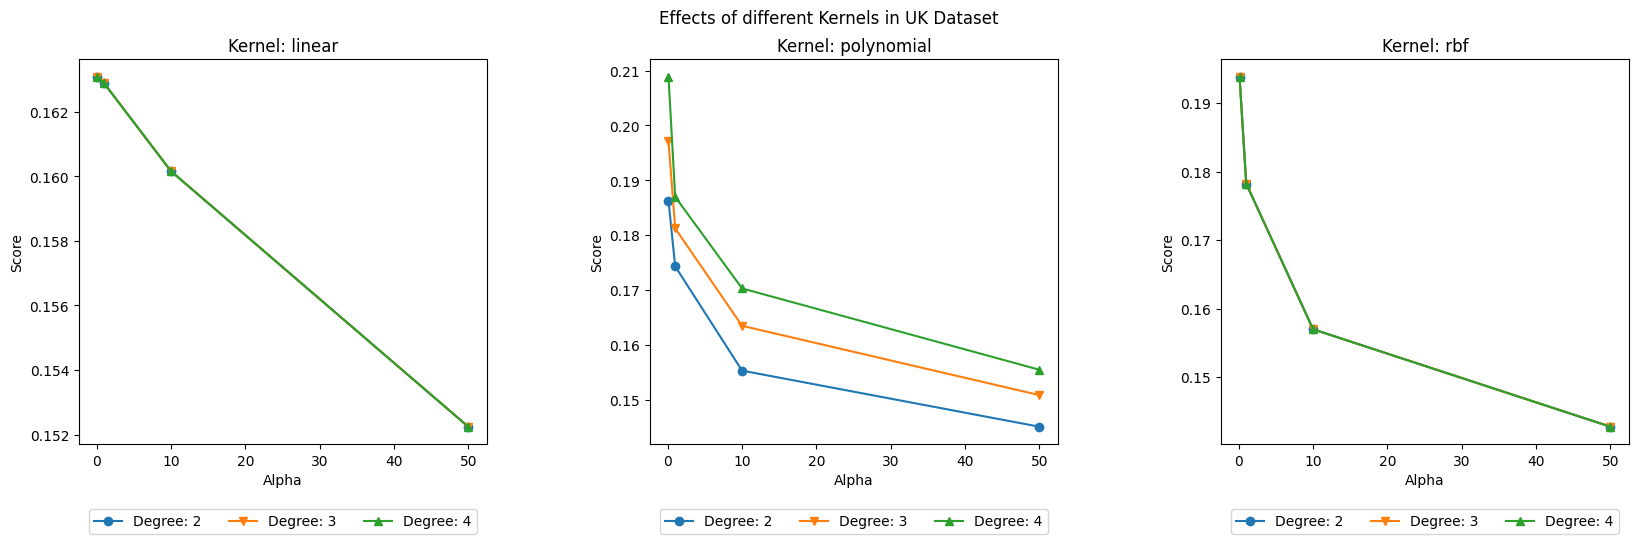

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.4)

markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']
for i, k in enumerate(param_grid['kernel']):
    ax = axs[i]
    for j, d in enumerate(param_grid['degree']):
        scores = [score_saver[k][a][d] for a in param_grid['alpha']]
        ax.plot(param_grid['alpha'], scores, label=f'Degree: {d}', marker=markers[j])
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Score')
    ax.set_title(f'Kernel: {k}')
    # Change the location of the legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.suptitle('Effects of different Kernels in UK Dataset')
plt.show()


In [ ]:
temp = []
for k in param_grid['kernel']:
    for d in param_grid['degree']:
        for a in param_grid['alpha']:
            score = score_saver[k][a][d]
            temp.append({'Kernel': k, 'Degree': d, 'Alpha': a, 'Score': score})
df = pd.DataFrame(temp).pivot_table(index=['Kernel', 'Degree'], columns='Alpha', values='Score')
df

Alpha                  0.1       1.0       10.0      50.0
Kernel     Degree                                        
linear     2       0.129606  0.129626  0.129802  0.130082
           3       0.129606  0.129626  0.129802  0.130082
           4       0.129606  0.129626  0.129802  0.130082
polynomial 2       0.134735  0.132739  0.130521  0.125915
           3       0.135020  0.134285  0.132292  0.130178
           4       0.134994  0.134878  0.133531  0.132263
rbf        2       0.134926  0.133667  0.131336  0.123819
           3       0.134926  0.133667  0.131336  0.123819
           4       0.134926  0.133667  0.131336  0.123819

Making Algorithm Comparisions

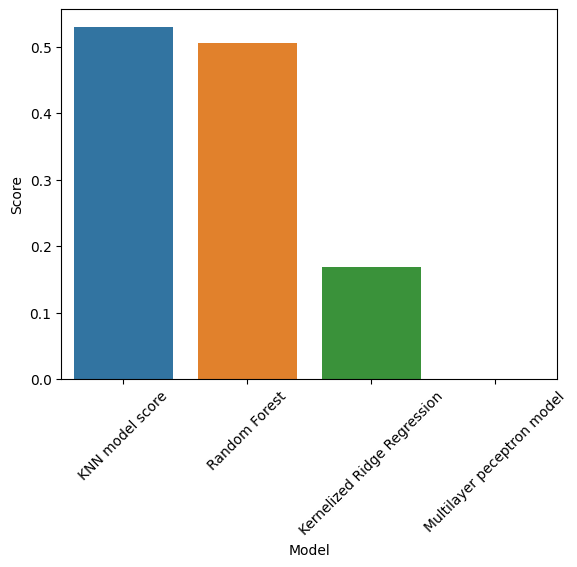

In [83]:
final_comparisions = {'Kernelized Ridge Regression': krr_model_score, 'Multilayer peceptron model': mlp_score, 'Random Forest': random_forest_score, 'KNN model score': knn_score}

d = []
for model, score in final_comparisions.items():
    d.append({'Model': model, 'Score': score})

# Sort the data by Score in descending order
d = sorted(d, key=lambda x: x['Score'], reverse=True)

df = pd.DataFrame(d)

# Create a bar plot with one bar for each model
sns.barplot(data=df, x='Model', y='Score')
plt.xticks(rotation=45)
plt.show()


Building a Pipeline

In [87]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', KNNRegressor(n_neighbors=2, distance_type = grid_search.best_params_['distance_type'], weighted = grid_search.best_params_['weighted']))
])

KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)


In [88]:
pipe.fit(X_train.to_numpy(), np.array(y_train))

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', <KNN.KNNRegressor object at 0x7d8bc49a58a0>)])

In [89]:
y_pred = pipe.predict(X_test.to_numpy())

In [90]:
print(f'R^2 score: ',r2_score(y_test, y_pred))

R^2 score:  0.5132847607354881


In [91]:
class InductiveConformalRegressor:
    def __init__(self, model):
        self.model = model

    def fit(self, X_train, y_train, X_cal, y_cal):
        # Fit underlying model to proper training set
        self.model.fit(X_train, y_train)

        # Calculate nonconformity scores for calibration set
        y_pred_cal = self.model.predict(X_cal)
        self.nc_scores_ = np.abs(y_pred_cal - y_cal)

    def predict(self, X, significance=0.05):
        # Make predictions using underlying model
        y_pred = self.model.predict(X)

        # Calculate prediction intervals
        n = len(self.nc_scores_)
        k = int(np.ceil(significance * n))
        threshold = np.partition(self.nc_scores_, -k)[-k]
        interval = np.abs(y_pred - threshold)
        lower = y_pred - interval
        upper = y_pred + interval
        return lower, upper


Splitting in  claibration sets

In [92]:
X_train, X_cal, y_train, y_cal = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [93]:
icp = InductiveConformalRegressor(pipe)
icp.fit(X_train.to_numpy(), np.array(y_train), X_cal.to_numpy(), np.array(y_cal))

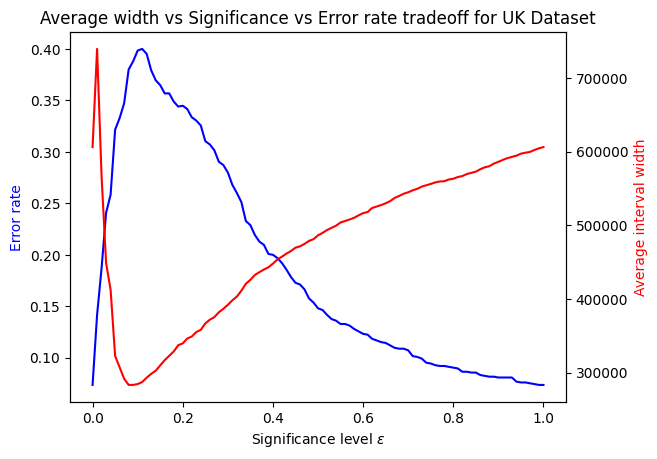

In [94]:
significance_levels = np.linspace(0, 1, 101)
error_rate = []
avg_width = []
# Calculating error rate and average interval width for each significance level
for significance in significance_levels:
    lower, upper = icp.predict(X_test.to_numpy(), significance=significance)

    # Calculating the error rate
    in_interval = np.logical_and(lower <= y_test, y_test <= upper)
    error_rate.append(1 - np.mean(in_interval))

    # Calculating average interval width
    width = upper - lower
    avg_width.append(np.mean(width))

# Plotting error rate and average interval width tradeoff with significance level
fig, ax1 = plt.subplots()
ax1.plot(significance_levels, error_rate, label='Error rate', color='b')
ax1.set_xlabel('Significance level $\epsilon$')
ax1.set_ylabel('Error rate', color='b')
ax2 = ax1.twinx()
ax2.plot(significance_levels, avg_width, label='Average interval width', color='r')
ax2.set_ylabel('Average interval width', color='r')
plt.title('Average width vs Significance vs Error rate tradeoff for UK Dataset')
plt.show()
